In [1]:
!pip3 install torch

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [3]:
n_pts = 100
centers = [[-0.5,0.5],[0.5,-0.5]]
x,y = datasets.make_blobs(n_samples = n_pts,random_state=123,centers=centers,cluster_std=0.4)
x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape(100,1))

In [4]:
type(x_data),x_data.dtype,y_data.dtype

(torch.Tensor, torch.float32, torch.float32)

In [5]:
print(x)
print(y)

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

In [6]:
def scatter_plot():
  plt.scatter(x[y==0,0],x[y==0,1])
  plt.scatter(x[y==1,0],x[y==1,1])

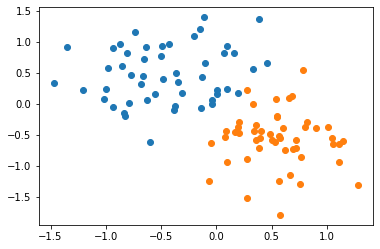

In [7]:
plt.scatter(x[y==0,0],x[y==0,1])
plt.scatter(x[y==1,0],x[y==1,1])

In [8]:
class Model(nn.Module):
  def __init__(self,in_parameters,out_parameters):
    super().__init__()
    self.linear = nn.Linear(in_parameters,out_parameters)
  def forward(self,x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def probability(self,x):
    predict = self.forward(x)
    if predict > 0.5:
      return 1
    else:
      return 0    


In [9]:
torch.manual_seed(2)
model = Model(2,1)

In [10]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
 tensor([0.1939], requires_grad=True)]

In [11]:
def get_params():
  w,b = model.parameters()
  w1,w2 = w[0][0].item(),w[0][1].item()
  b1 = b[0].item()
  return (w1,w2,b1)


In [12]:
def plot_fit(title):
  plt.title = title
  w1,w2,b1 = get_params()
  x1 = np.array([-1.5,1.5])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1,x2, 'r')
  scatter_plot()

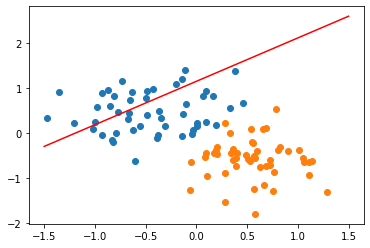

In [13]:
plot_fit('Initial Model')

In [14]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [15]:
epochs = 40000
losses = []
for i in range(epochs):
  
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred,y_data.float())
  print('the epoch is {} and the loss is {}'.format(i,loss.item()))
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Streaming output truncated to the last 5000 lines.
the epoch is 35001 and the loss is 0.14053000509738922
the epoch is 35002 and the loss is 0.14052808284759521
the epoch is 35003 and the loss is 0.1405261754989624
the epoch is 35004 and the loss is 0.1405242681503296
the epoch is 35005 and the loss is 0.1405223309993744
the epoch is 35006 and the loss is 0.14052042365074158
the epoch is 35007 and the loss is 0.14051853120326996
the epoch is 35008 and the loss is 0.14051660895347595
the epoch is 35009 and the loss is 0.14051467180252075
the epoch is 35010 and the loss is 0.14051279425621033
the epoch is 35011 and the loss is 0.14051085710525513
the epoch is 35012 and the loss is 0.14050894975662231
the epoch is 35013 and the loss is 0.1405070275068283
the epoch is 35014 and the loss is 0.1405051350593567
the epoch is 35015 and the loss is 0.14050321280956268
the epoch is 35016 and the loss is 0.14050127565860748
the epoch is 35017 and the loss is 0.14049935340881348
the epoch is 35018 

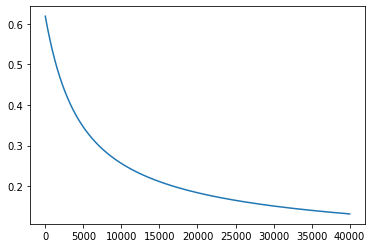

In [16]:
plt.plot(range(epochs),losses)

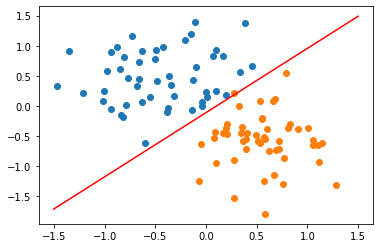

In [17]:
plot_fit('trained model')

red point is having probablity 0
black point is having probablity 1


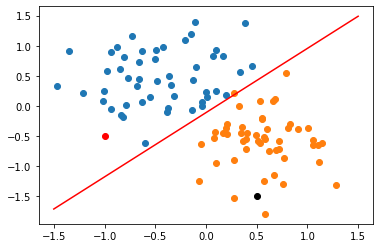

In [18]:
point_a = torch.Tensor([-1,-0.5])
point_b = torch.Tensor([0.5,-1.5])
plt.plot(point_a.numpy()[0],point_a.numpy()[1], 'ro')
plt.plot(point_b.numpy()[0],point_b[1], 'ko')
print('red point is having probablity {}'.format(model.probability(point_a)))
print('black point is having probablity {}'.format(model.probability(point_b)))
plot_fit('trained model')